# Comprensión de los Datos
**Proyecto Machine Learning:** EDA de Nacimientos y Defunciones
Objetivo: Explorar y entender los datasets disponibles para preparar futuros modelos de Machine Learning.


In [1]:
#  1. Importación de librerías y configuración


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración general
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Opciones de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Librerías importadas correctamente")







Librerías importadas correctamente


In [2]:

#  2. Carga de datos

ruta_por_sexo = r"C:\ProyectoML2\proyecto-ml\data\01_raw\dataset_nacimiento-defuncion_por_sexo.csv"
ruta_defunciones_filtradas = r"C:\ProyectoML2\proyecto-ml\data\01_raw\datos_filtrados_2014_2023.csv"
ruta_por_edad_madre = r"C:\ProyectoML2\proyecto-ml\data\01_raw\nacimiento_rango_edad_madre.csv"
ruta_por_edad_fallecido = r"C:\ProyectoML2\proyecto-ml\data\01_raw\rango_edad_fallecido.csv"
ruta_setdedatos = r"C:\ProyectoML2\proyecto-ml\data\01_raw\setdedatos.csv"

# Probar leer con ',' y si no funciona, con ';'
def cargar_csv(ruta):
    try:
        return pd.read_csv(ruta)
    except:
        return pd.read_csv(ruta, sep=";")

por_sexo = cargar_csv(ruta_por_sexo)
defunciones_filtradas = cargar_csv(ruta_defunciones_filtradas)
por_edad_madre = cargar_csv(ruta_por_edad_madre)
por_edad_fallecido = cargar_csv(ruta_por_edad_fallecido)
setdedatos = cargar_csv(ruta_setdedatos)

print("Archivos cargados correctamente")


Archivos cargados correctamente


In [8]:
# 3. Exploración inicial de los datasets

datasets = {
    "por_sexo": por_sexo,
    "defunciones_filtradas": defunciones_filtradas,
    "por_edad_madre": por_edad_madre,
    "por_edad_fallecido": por_edad_fallecido,
    "setdedatos": setdedatos
}

for nombre, df in datasets.items():
    print(f"\n=== {nombre.upper()} ===")
    print(df.head(), "\n")       # primeras filas
    print(df.info(), "\n")       # info general
    print("Valores nulos por columna:\n", df.isnull().sum(), "\n")
    print("Duplicados:", df.duplicated().sum(), "\n")
    print("="*50)



=== POR_SEXO ===
    Año  Nacimiento (Hombre)  Nacimiento (Mujer)  Defuncion(Hombre)  \
0  2023                87713               84262              63174   
1  2022                96011               93284              71676   
2  2021                90355               86883              73308   
3  2020                99908               95025              67453   
4  2019               107353              102812              57632   

   Defuncion (Mujer)  
0              58085  
1              65275  
2              64119  
3              58367  
4              52010   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Año                  9 non-null      int64
 1   Nacimiento (Hombre)  9 non-null      int64
 2   Nacimiento (Mujer)   9 non-null      int64
 3   Defuncion(Hombre)    9 non-null      int64
 4   Defuncion (Mujer)    9

## Resumen por dataset

### `por_sexo`
- Datos por año, desagregados por sexo.  
- No tiene nulos ni duplicados.  
- Muy limpio.  

### `defunciones_filtradas`
- Es el dataset más grande (+1.2 millones de registros).  
- Variables: año, fecha de defunción, sexo, edad, comuna, región, causa (CIE10).  
- Problemas detectados:  
  - 19 nulos en `FECHA_DEF`  
  - 4 nulos en `COD_COMUNA`, `COMUNA`, `NOMBRE_REGION`  
  - 3.844 duplicados  
- Requiere limpieza.  

### `por_edad_madre`
- Nacimientos por rango de edad de la madre.  
- Muy limpio, sin nulos ni duplicados.  

### `por_edad_fallecido`
- Defunciones por rango de edad.  
- Muy limpio, sin nulos ni duplicados.  

### `setdedatos`
- Nacimientos y defunciones totales por año (más largo que `por_sexo`).  
- Sin nulos ni duplicados.  


In [9]:
# 3. Análisis exploratorio de datos (EDA)
# 3.1 Estadísticas descriptivas básicas

# Revisar estadísticas descriptivas
print("=== por_sexo ===")
display(por_sexo.describe(include="all"))

print("=== defunciones_filtradas ===")
display(defunciones_filtradas.describe(include="all"))

print("=== por_edad_madre ===")
display(por_edad_madre.describe(include="all"))

print("=== por_edad_fallecido ===")
display(por_edad_fallecido.describe(include="all"))

print("=== setdedatos ===")
display(setdedatos.describe(include="all"))


=== por_sexo ===


,Año,Nacimiento (Hombre),Nacimiento (Mujer),Defuncion(Hombre),Defuncion (Mujer)
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2019.000000,105394.777778,101365.666667,61618.111111,55220.777778
std,2.738613,12676.898445,12264.416364,7498.664422,6423.530625
min,2015.000000,87713.000000,84262.000000,54693.000000,48615.000000
25%,2017.000000,96011.000000,93284.000000,55773.000000,50593.000000
50%,2019.000000,107353.000000,102812.000000,57632.000000,52010.000000
75%,2021.000000,113039.000000,108668.000000,67453.000000,58367.000000
max,2023.000000,124713.000000,119936.000000,73308.000000,65275.000000


=== defunciones_filtradas ===


,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1
count,1.250062e+06,1250043,1250062,1.250062e+06,1.250062e+06,1.250058e+06,1250058,1250058,1250062,1250062
unique,NaN,3924,3,NaN,NaN,NaN,347,17,20,20
top,NaN,2020-06-14,Hombre,NaN,NaN,NaN,Puente Alto,Metropolitana de Santiago,I00-I99,Enfermedades del sistema circulatorio
freq,NaN,588,658622,NaN,NaN,NaN,30607,472582,315998,315998
mean,2.019177e+03,NaN,NaN,1.025212e+00,7.222077e+01,9.774242e+03,NaN,NaN,NaN,NaN
std,3.081910e+00,NaN,NaN,2.477622e-01,1.881944e+01,3.943688e+03,NaN,NaN,NaN,NaN
min,2.014000e+03,NaN,NaN,0.000000e+00,0.000000e+00,1.101000e+03,NaN,NaN,NaN,NaN
25%,2.017000e+03,NaN,NaN,1.000000e+00,6.300000e+01,6.115000e+03,NaN,NaN,NaN,NaN
50%,2.019000e+03,NaN,NaN,1.000000e+00,7.600000e+01,1.010200e+04,NaN,NaN,NaN,NaN
75%,2.022000e+03,NaN,NaN,1.000000e+00,8.600000e+01,1.312100e+04,NaN,NaN,NaN,NaN


=== por_edad_madre ===


,Año,Menores de 15 años,15 a 19 años,20 a 24 años,25 a 29 años,30 a 34 años,35 a 39 años,40 a 44 años,45 a 49 años,50 y más años
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2016.5000,557.785714,20606.642857,46497.785714,57007.928571,54142.857143,32793.285714,8868.571429,502.071429,17.428571
std,4.1833,319.658755,11702.972322,11610.363614,5624.140023,2523.504153,1156.107357,395.007247,46.085980,8.635475
min,2010.0000,158.000000,6428.000000,28334.000000,45178.000000,50523.000000,30989.000000,8257.000000,441.000000,5.000000
25%,2013.2500,237.750000,10033.000000,36798.000000,54511.250000,52148.250000,31778.250000,8529.250000,469.500000,12.250000
50%,2016.5000,560.500000,18709.000000,46972.500000,58574.500000,54077.500000,32760.000000,8825.500000,495.000000,16.500000
75%,2019.7500,872.250000,30993.000000,57433.500000,60953.500000,56270.000000,33588.250000,9078.250000,526.000000,23.750000
max,2023.0000,963.000000,38047.000000,59884.000000,63210.000000,57520.000000,34942.000000,9545.000000,602.000000,32.000000


=== por_edad_fallecido ===


,Año,Menores de 1 año,1 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 o mas
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2016.5000,1512.142857,252.857143,161.071429,199.928571,573.857143,932.142857,1101.285714,1255.142857,1516.142857,2080.857143,3017.357143,97780.928571
std,4.1833,314.684667,35.337618,18.441026,23.860054,74.538433,67.964761,97.543228,179.701401,141.551761,153.867504,257.363140,14098.692910
min,2010.0000,1022.000000,204.000000,129.000000,162.000000,465.000000,857.000000,955.000000,1088.000000,1347.000000,1847.000000,2710.000000,81954.000000
25%,2013.2500,1195.500000,217.750000,147.000000,181.000000,524.750000,879.750000,1040.500000,1140.750000,1416.250000,2011.000000,2765.750000,87667.250000
50%,2016.5000,1593.000000,255.500000,165.500000,198.500000,565.000000,908.000000,1091.500000,1159.500000,1470.000000,2069.500000,3015.000000,93243.000000
75%,2019.7500,1782.000000,282.250000,171.250000,214.250000,620.750000,959.250000,1158.500000,1366.250000,1603.500000,2140.000000,3161.750000,106184.500000
max,2023.0000,1908.000000,312.000000,188.000000,238.000000,733.000000,1065.000000,1276.000000,1618.000000,1803.000000,2391.000000,3589.000000,123781.000000


=== setdedatos ===


,año,Nacimientos,Defunciones
count,50.00000,50.000000,50.000000
mean,1998.50000,243175.120000,87280.060000
std,14.57738,26095.855178,17045.236367
min,1974.00000,171992.000000,69887.000000
25%,1986.25000,230969.000000,74563.250000
50%,1998.50000,246348.500000,80397.000000
75%,2010.75000,256954.500000,97193.750000
max,2023.00000,292146.000000,137439.000000


### 3.1 Estadísticas descriptivas básicas

A continuación se presentan los principales hallazgos obtenidos de las estadísticas descriptivas de cada dataset:  

- **por_sexo**  
  - Contiene datos entre 2015 y 2023.  
  - Promedio de nacimientos: ~105 mil hombres y ~101 mil mujeres por año.  
  - Defunciones: ~61 mil hombres y ~55 mil mujeres por año.  
  - No presenta valores nulos ni duplicados. Dataset limpio y consistente.  

- **defunciones_filtradas**  
  - Dataset más extenso, con más de **1.25 millones de registros**.  
  - Variables clave: año, fecha de defunción, sexo, edad, comuna, región y causa (CIE10).  
  - Se detectan:
    - **19 nulos** en `FECHA_DEF`.  
    - **4 nulos** en `COD_COMUNA`, `COMUNA` y `NOMBRE_REGION`.  
    - **3.844 duplicados**.  
  - Requiere procesos de limpieza y depuración antes de análisis más profundos.  

- **por_edad_madre**  
  - Incluye datos de 2010 a 2023.  
  - Promedio anual:  
    - Mayor concentración de nacimientos entre **25–34 años** (aprox. 110 mil en conjunto).  
    - Casos extremos en “menores de 15” y “50+” son muy bajos (decenas a pocos cientos).  
  - Dataset muy limpio, sin nulos ni duplicados.  

- **por_edad_fallecido**  
  - Cobertura entre 2010 y 2023.  
  - La gran mayoría de defunciones ocurre en el grupo **50+ años** (~97–123 mil muertes anuales).  
  - Mortalidad infantil (<1 año) ronda entre 1.000 y 1.900 casos anuales.  
  - Dataset muy limpio y consistente.  

- **setdedatos**  
  - Serie más larga: 1974–2023 (50 años).  
  - Nacimientos: fluctuaron entre **171 mil (mín.) y 292 mil (máx.)**.  
  - Defunciones: entre **69 mil y 137 mil**.  
  - No presenta nulos ni duplicados, es adecuado para análisis de tendencias de largo plazo.  


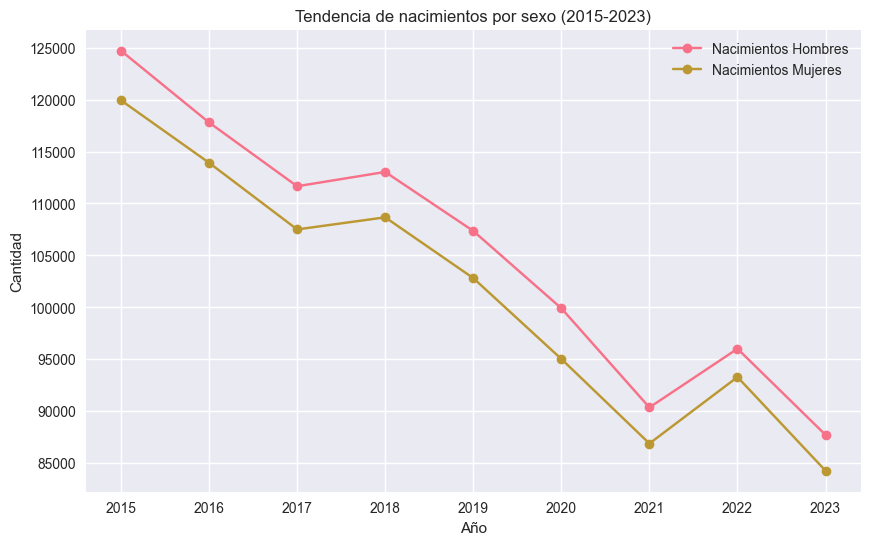

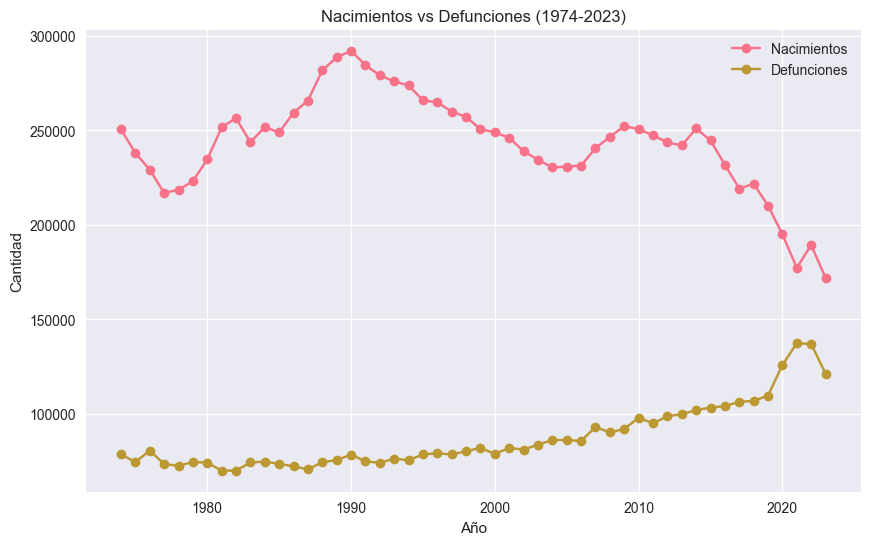

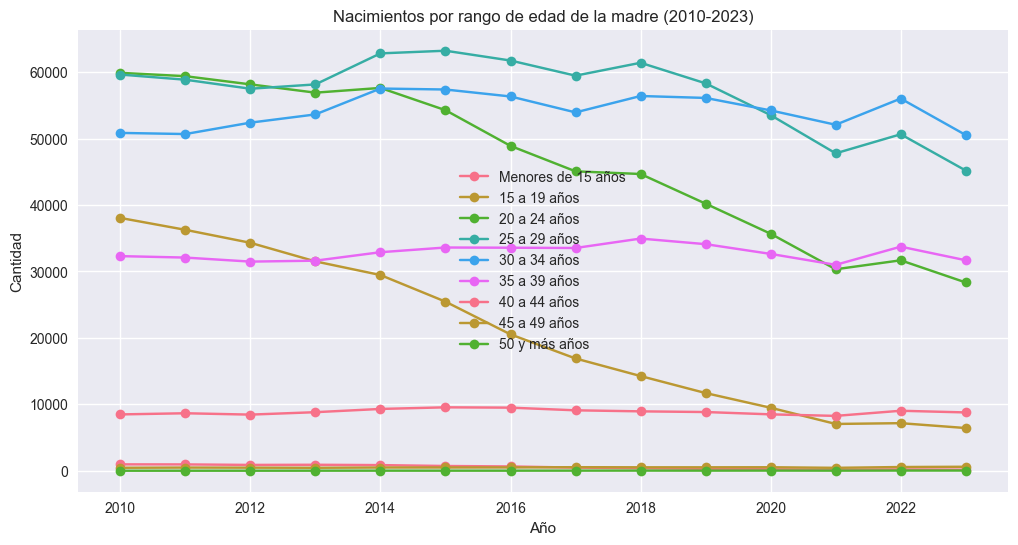

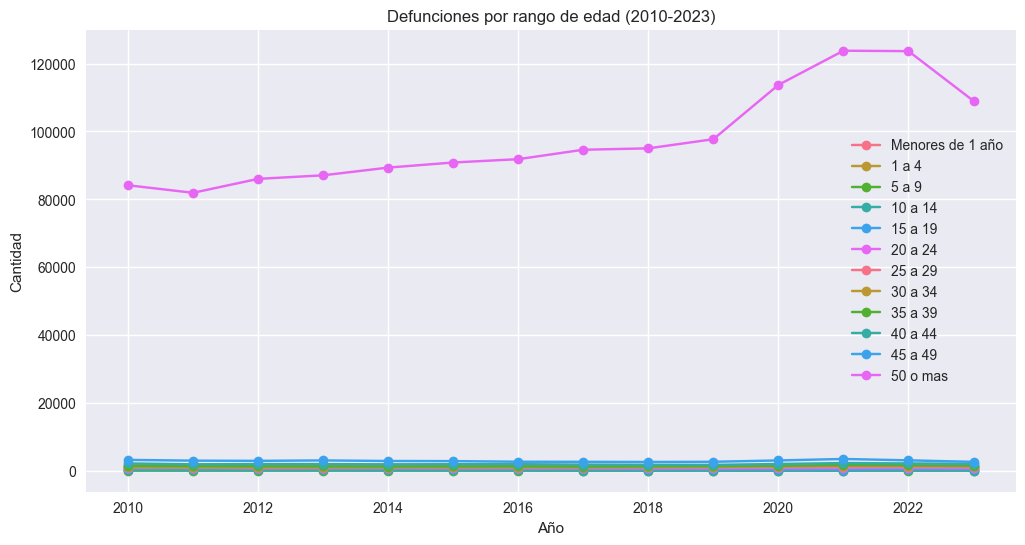

In [10]:
# 3.2 Visualización de tendencias temporales


# --- Dataset por_sexo ---
plt.figure(figsize=(10,6))
plt.plot(por_sexo["Año"], por_sexo["Nacimiento (Hombre)"], marker="o", label="Nacimientos Hombres")
plt.plot(por_sexo["Año"], por_sexo["Nacimiento (Mujer)"], marker="o", label="Nacimientos Mujeres")
plt.title("Tendencia de nacimientos por sexo (2015-2023)")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.legend()
plt.grid(True)
plt.show()

# --- Dataset setdedatos ---
plt.figure(figsize=(10,6))
plt.plot(setdedatos["año"], setdedatos["Nacimientos"], marker="o", label="Nacimientos")
plt.plot(setdedatos["año"], setdedatos["Defunciones"], marker="o", label="Defunciones")
plt.title("Nacimientos vs Defunciones (1974-2023)")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.legend()
plt.grid(True)
plt.show()

# --- Dataset por_edad_madre ---
por_edad_madre.plot(x="Año", figsize=(12,6), marker="o")
plt.title("Nacimientos por rango de edad de la madre (2010-2023)")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# --- Dataset por_edad_fallecido ---
por_edad_fallecido.plot(x="Año", figsize=(12,6), marker="o")
plt.title("Defunciones por rango de edad (2010-2023)")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()


### 3.2 Visualización de tendencias temporales

- **Nacimientos por sexo (2015-2023)**  
  Se observa una ligera disminución en los nacimientos en los últimos años. La brecha entre hombres y mujeres se mantiene estable, con una leve mayoría de nacimientos de hombres.  

- **Nacimientos vs Defunciones (1974-2023)**  
  - Desde 1974 hasta mediados de los 2000, los nacimientos estuvieron muy por encima de las defunciones.  
  - A partir de 2015 se observa una **caída en los nacimientos**, mientras que las defunciones muestran una **tendencia creciente**, acercándose al cruce de curvas.  
  - Esto sugiere un **envejecimiento de la población** y potencial disminución del crecimiento poblacional.  

- **Nacimientos por rango de edad de la madre (2010-2023)**  
  - La mayoría de nacimientos se concentra en mujeres entre **25 y 34 años**.  
  - Se observa una tendencia estable en esos rangos, aunque con leve disminución hacia 2020–2023.  
  - En madres adolescentes (<20) y en mujeres de 40+ años, los valores son bajos y estables.  

- **Defunciones por rango de edad (2010-2023)**  
  - La gran mayoría de defunciones ocurre en el grupo **50+ años**.  
  - Mortalidad infantil (<1 año) se mantiene estable, en torno a 1.000–2.000 casos por año.  
  - Los grupos intermedios (15–49 años) tienen cifras mucho menores, sin grandes variaciones.  


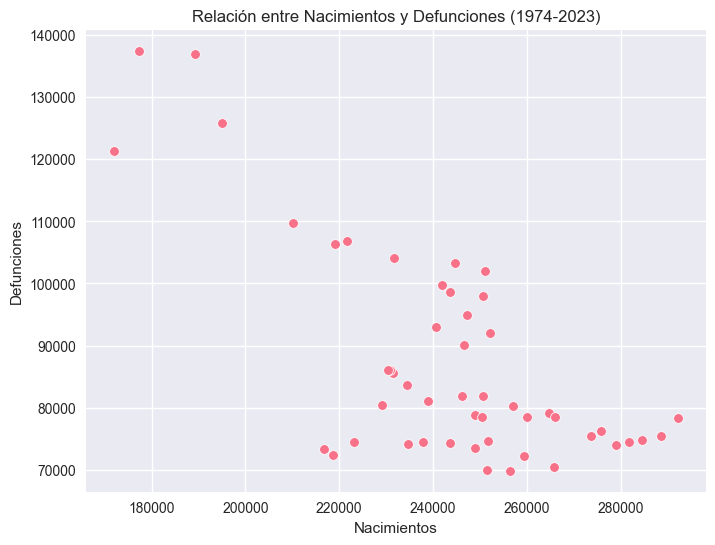

Correlación entre Nacimientos y Defunciones:


,Nacimientos,Defunciones
Nacimientos,1.000000,-0.714929
Defunciones,-0.714929,1.000000


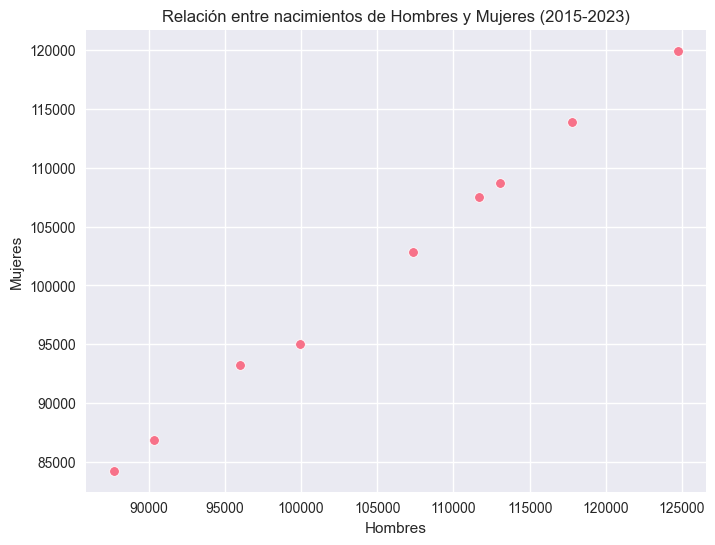

Correlación entre nacimientos Hombres y Mujeres:


,Nacimiento (Hombre),Nacimiento (Mujer)
Nacimiento (Hombre),1.000000,0.998921
Nacimiento (Mujer),0.998921,1.000000


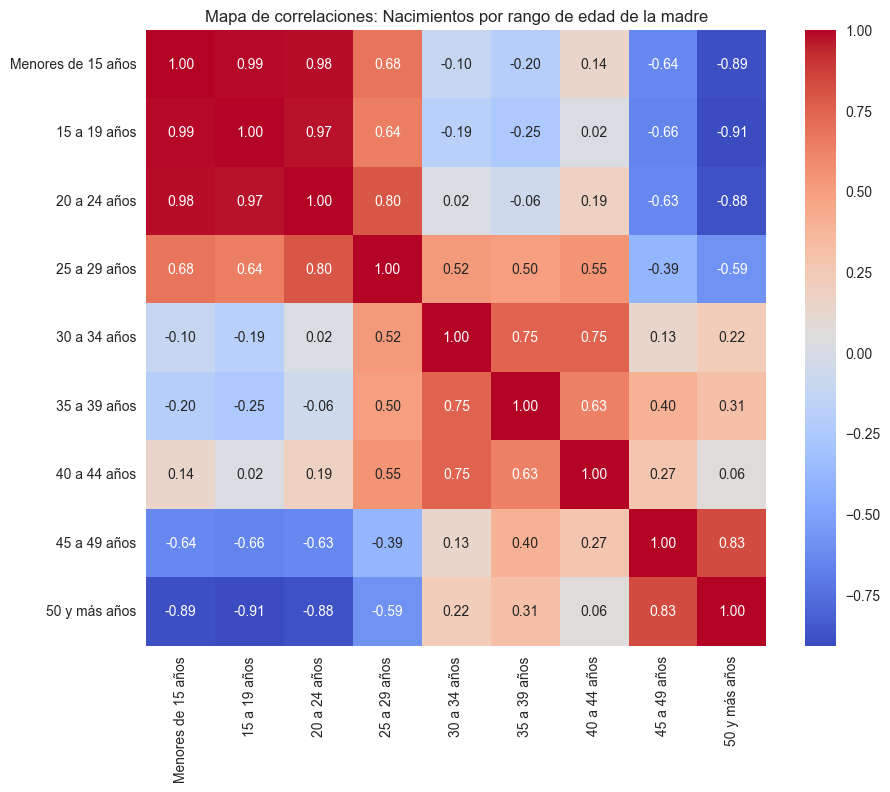

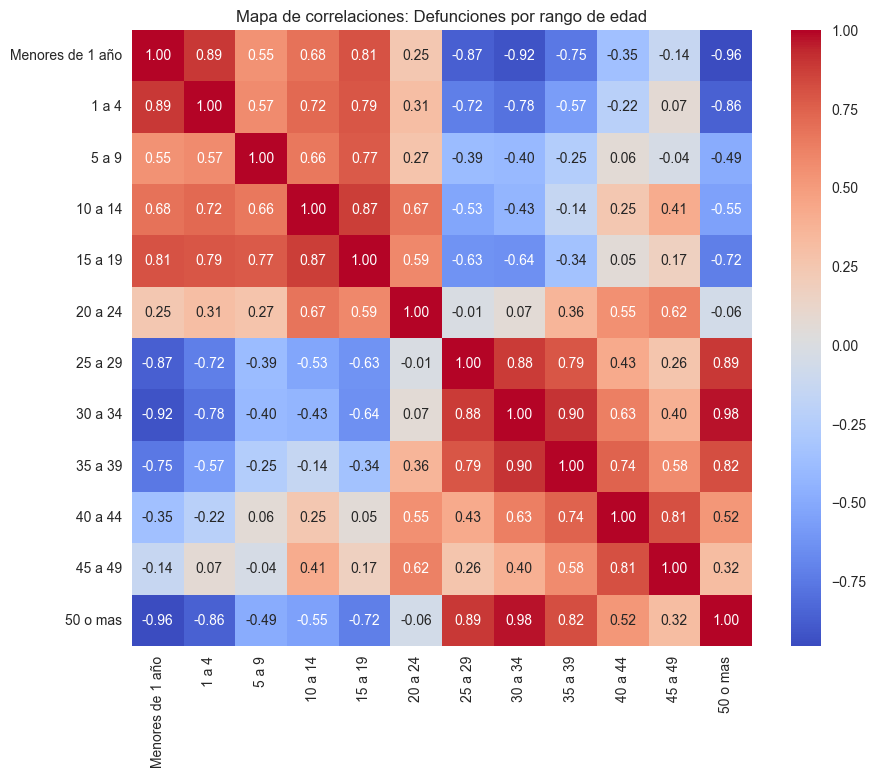

In [12]:
# 3.3 Correlaciones y relaciones entre variables


# --- Correlación entre nacimientos y defunciones totales (setdedatos) ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=setdedatos, x="Nacimientos", y="Defunciones")
plt.title("Relación entre Nacimientos y Defunciones (1974-2023)")
plt.xlabel("Nacimientos")
plt.ylabel("Defunciones")
plt.grid(True)
plt.show()

# Correlación numérica
correlacion = setdedatos[["Nacimientos","Defunciones"]].corr()
print("Correlación entre Nacimientos y Defunciones:")
display(correlacion)

# --- Correlación entre nacimientos por sexo (por_sexo) ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=por_sexo, x="Nacimiento (Hombre)", y="Nacimiento (Mujer)")
plt.title("Relación entre nacimientos de Hombres y Mujeres (2015-2023)")
plt.xlabel("Hombres")
plt.ylabel("Mujeres")
plt.grid(True)
plt.show()

correlacion_sexo = por_sexo[["Nacimiento (Hombre)", "Nacimiento (Mujer)"]].corr()
print("Correlación entre nacimientos Hombres y Mujeres:")
display(correlacion_sexo)

# --- Heatmap de correlaciones para por_edad_madre ---
plt.figure(figsize=(10,8))
sns.heatmap(por_edad_madre.drop("Año", axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de correlaciones: Nacimientos por rango de edad de la madre")
plt.show()

# --- Heatmap de correlaciones para por_edad_fallecido ---
plt.figure(figsize=(10,8))
sns.heatmap(por_edad_fallecido.drop("Año", axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de correlaciones: Defunciones por rango de edad")
plt.show()



### 3.3 Correlaciones y relaciones entre variables

- Se calcula la correlación entre los nacimientos y defunciones totales en el dataset `setdedatos`. Esto permite ver si hay alguna relación lineal entre ambas variables históricamente.
- Se calcula la correlación entre los nacimientos de hombres y mujeres en `por_sexo` para confirmar que los patrones son similares por sexo.
- Se generan mapas de calor (`heatmaps`) de correlaciones para los rangos de edad en `por_edad_madre` y `por_edad_fallecido`, mostrando cómo se relacionan los diferentes grupos etarios entre sí.


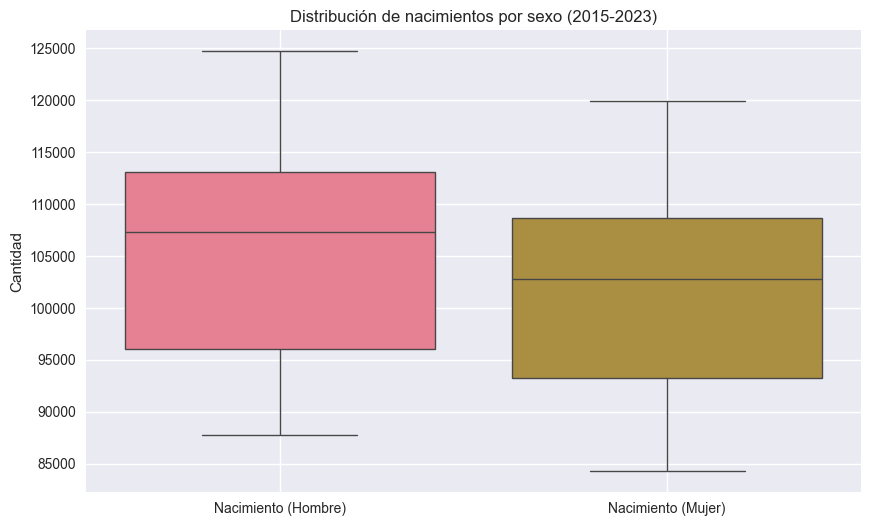

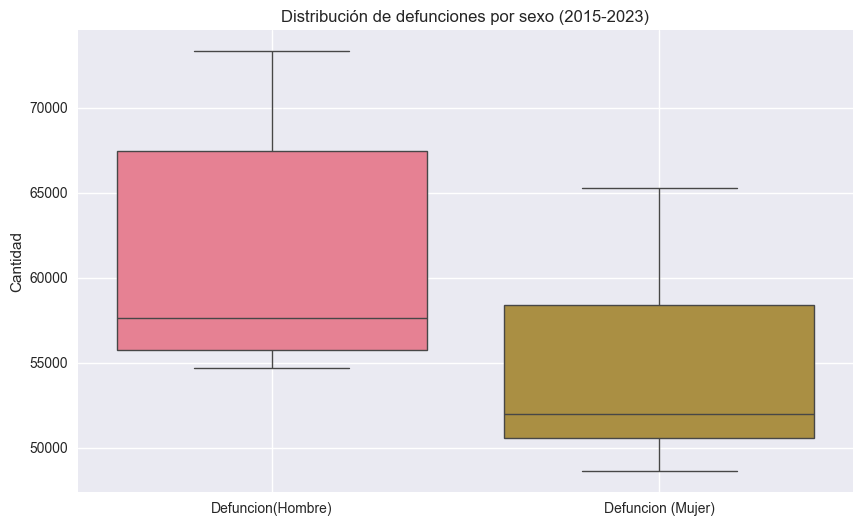

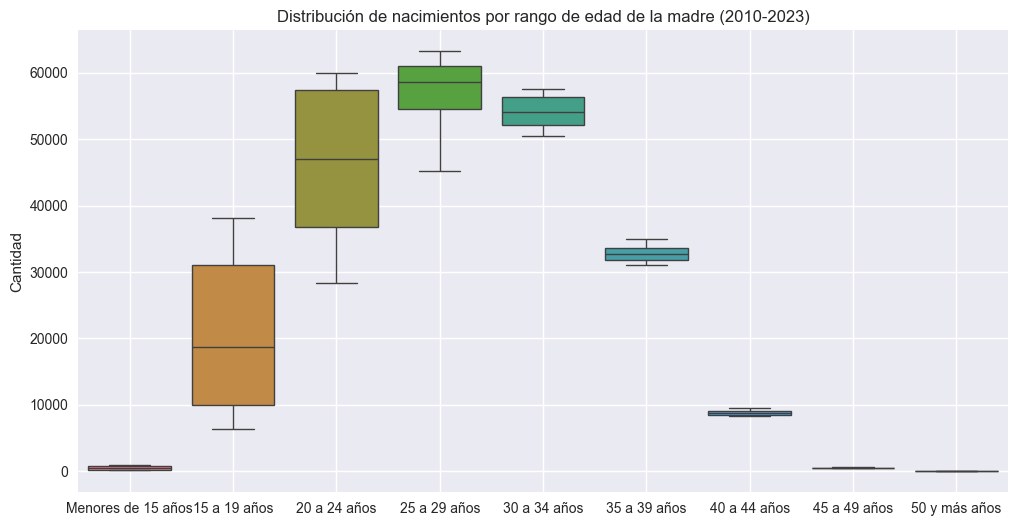

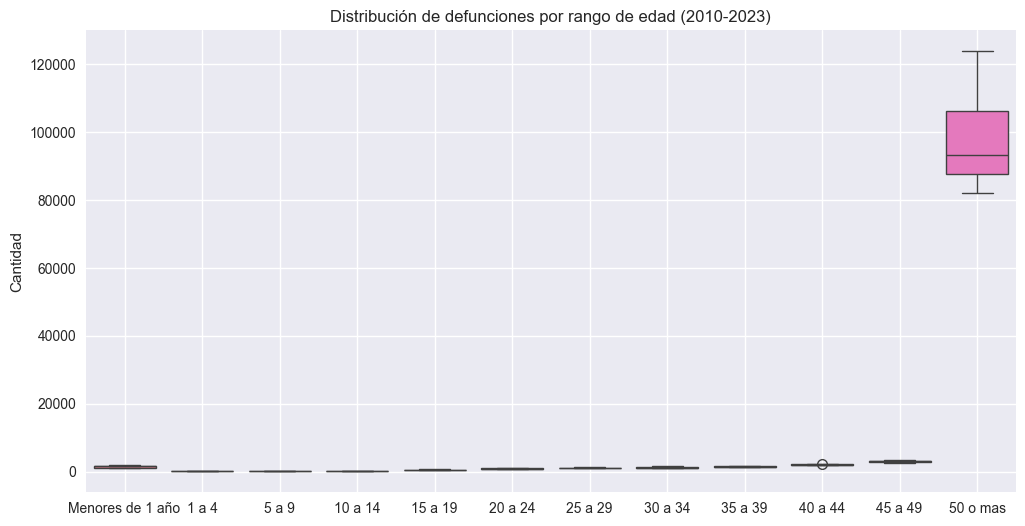

In [13]:
# 3.4 Distribuciones y boxplots

# --- Nacimientos por sexo ---
plt.figure(figsize=(10,6))
sns.boxplot(data=por_sexo[["Nacimiento (Hombre)", "Nacimiento (Mujer)"]])
plt.title("Distribución de nacimientos por sexo (2015-2023)")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# --- Defunciones por sexo ---
plt.figure(figsize=(10,6))
sns.boxplot(data=por_sexo[["Defuncion(Hombre)", "Defuncion (Mujer)"]])
plt.title("Distribución de defunciones por sexo (2015-2023)")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# --- Nacimientos por rango de edad de la madre ---
plt.figure(figsize=(12,6))
sns.boxplot(data=por_edad_madre.drop(columns="Año"))
plt.title("Distribución de nacimientos por rango de edad de la madre (2010-2023)")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# --- Defunciones por rango de edad ---
plt.figure(figsize=(12,6))
sns.boxplot(data=por_edad_fallecido.drop(columns="Año"))
plt.title("Distribución de defunciones por rango de edad (2010-2023)")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()


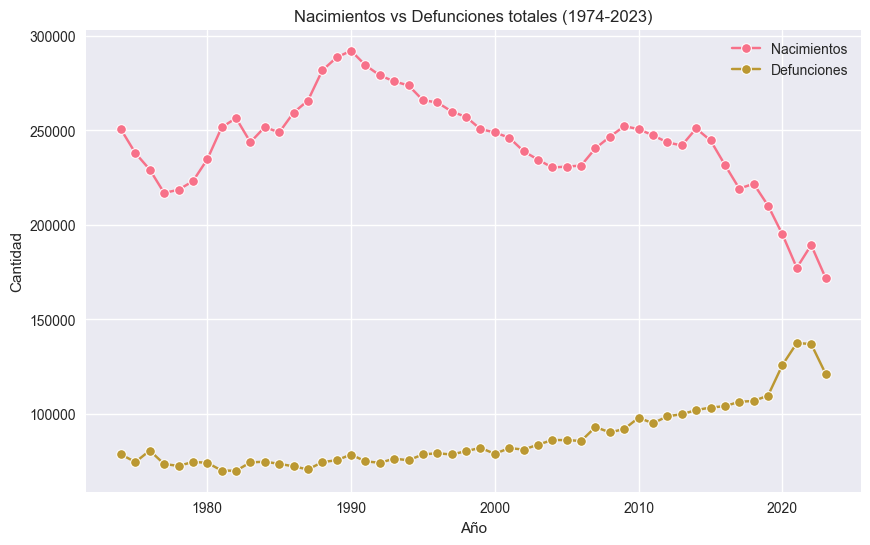

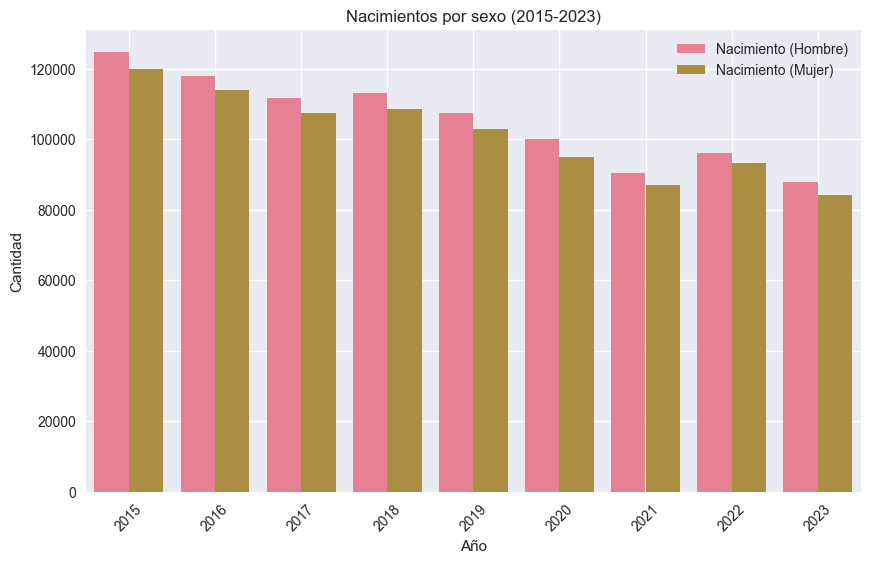

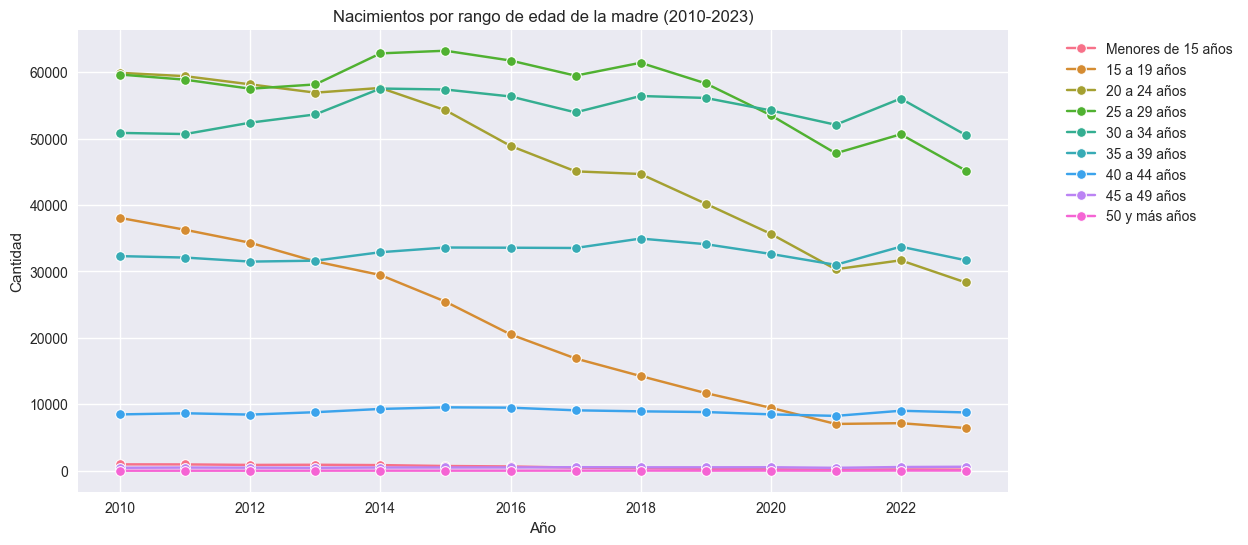

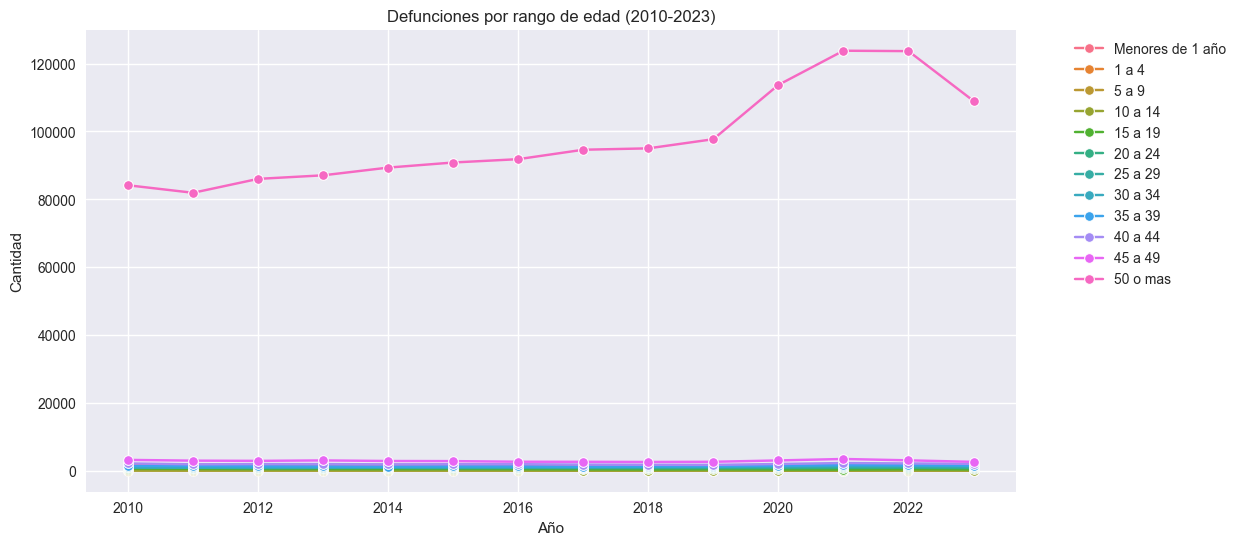

In [14]:
# 3.5 Resumen gráfico de hallazgos clave

# --- Comparación nacimientos totales vs defunciones totales ---
plt.figure(figsize=(10,6))
sns.lineplot(x="año", y="Nacimientos", data=setdedatos, marker="o", label="Nacimientos")
sns.lineplot(x="año", y="Defunciones", data=setdedatos, marker="o", label="Defunciones")
plt.title("Nacimientos vs Defunciones totales (1974-2023)")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.legend()
plt.grid(True)
plt.show()

# --- Distribución de nacimientos por sexo ---
por_sexo_melted = por_sexo.melt(id_vars="Año", value_vars=["Nacimiento (Hombre)", "Nacimiento (Mujer)"],
                                var_name="Sexo", value_name="Cantidad")
plt.figure(figsize=(10,6))
sns.barplot(x="Año", y="Cantidad", hue="Sexo", data=por_sexo_melted)
plt.title("Nacimientos por sexo (2015-2023)")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# --- Nacimientos por rango de edad de la madre ---
por_edad_madre_melted = por_edad_madre.melt(id_vars="Año", var_name="Rango de edad", value_name="Cantidad")
plt.figure(figsize=(12,6))
sns.lineplot(x="Año", y="Cantidad", hue="Rango de edad", data=por_edad_madre_melted, marker="o")
plt.title("Nacimientos por rango de edad de la madre (2010-2023)")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# --- Defunciones por rango de edad ---
por_edad_fallecido_melted = por_edad_fallecido.melt(id_vars="Año", var_name="Rango de edad", value_name="Cantidad")
plt.figure(figsize=(12,6))
sns.lineplot(x="Año", y="Cantidad", hue="Rango de edad", data=por_edad_fallecido_melted, marker="o")
plt.title("Defunciones por rango de edad (2010-2023)")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


# 3.6 Conclusión del EDA


Tras explorar los distintos datasets sobre nacimientos y defunciones en Chile, se observan los siguientes puntos clave:

1. Datos limpios y consistentes en la mayoría de los casos:
   - 'por_sexo', 'por_edad_madre', 'por_edad_fallecido' y 'setdedatos' no presentan valores nulos ni duplicados, por lo que están listos para análisis y modelamiento.

2. Dataset 'defunciones_filtradas' requiere limpieza:
   - Contiene 19 valores nulos en 'FECHA_DEF', 4 nulos en información de comuna/región y 3.844 duplicados.
   - Se recomienda depuración antes de integrarlo con otros análisis.

3. Tendencias temporales claras:
   - Los nacimientos muestran un ligero descenso en los últimos años según 'por_sexo' y 'setdedatos'.
   - Las defunciones totales se mantienen relativamente estables, con un aumento en ciertos años recientes.

4. Distribución por grupos de edad:
   - La mayoría de nacimientos se concentra en madres de 25 a 34 años.
   - La mortalidad aumenta significativamente a partir de los 50 años.

5. Preparación para análisis posterior:
   - Con los datasets limpios y las tendencias identificadas, se puede avanzar a modelamiento, predicciones o análisis de causas de defunción.

En resumen, el EDA permitió comprender la estructura, calidad y patrones principales de los datos, identificando los datasets listos para análisis y aquellos que requieren limpieza adicional.

